In [1]:
# TO understand under/over fitting first we have to know the concept of bias and varience

In [2]:
# bias= the gap between actual and prediction value

In [3]:
# varience= how the data points are scatter in the plot 

In [4]:
# if the bias is low and varience is high it will create under fitting problem

In [5]:
# if the bias is high and varience is low it will create over fitting problem

In [6]:
# we need a cut off points where the underfitting and overfittin is very low

'[title]' is not recognized as an internal or external command,
operable program or batch file.


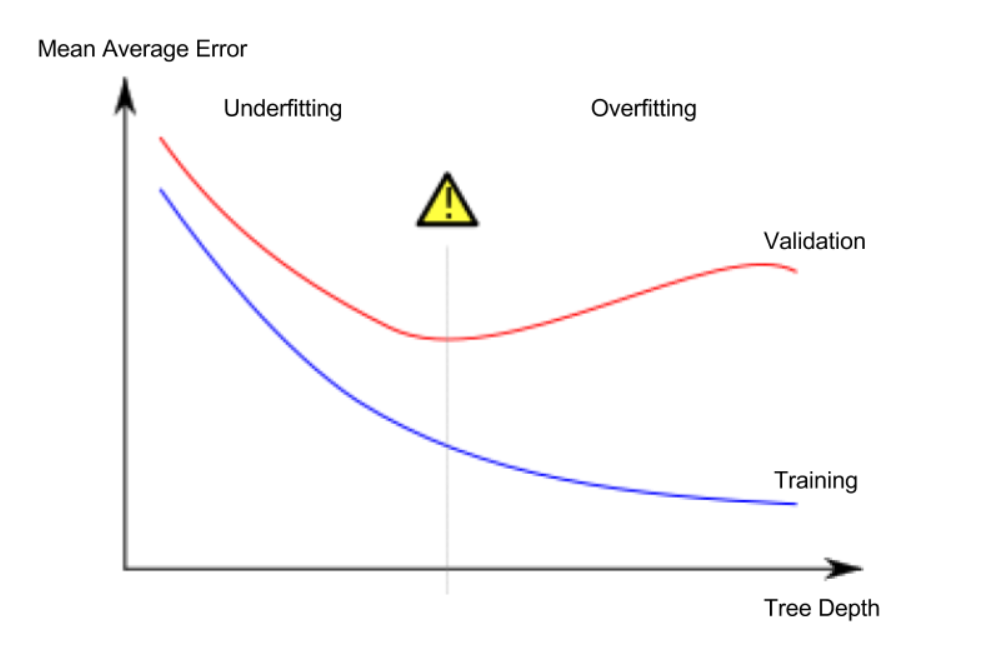

In [14]:
from IPython.display import Image
Image('Under_Over.PNG',height=600, width=600)

In [15]:
# We can use a utility function to help compare MAE scores from different values for max_leaf_nodes

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv('melb_data.csv')

In [18]:
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [19]:
df.dropna(inplace=True)

In [20]:
y=df.Price

In [21]:
X=df[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [27]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  369084
Max leaf nodes: 50  		 Mean Absolute Error:  275869
Max leaf nodes: 500  		 Mean Absolute Error:  254522
Max leaf nodes: 5000  		 Mean Absolute Error:  263304
